In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from opera_tropo import download

In [10]:
date = '20190613'
hour = '00'

hres_sds = download.HRESConfig('/u/aurora-r0/govorcin/01_OPERA/TROPO/interface/data',
                               date, hour, version=1)

In [7]:
hres_sds.s3_bucket = 'opera-ecmwf'

In [11]:
hres_sds

HRESConfig(output_path='/u/aurora-r0/govorcin/01_OPERA/TROPO/interface/data', date='20190613', hour='00', version=1, s3_bucket='opera-dev-lts-fwd-hyunlee', region_name='us-west-2')

In [12]:
# Download
download.download_hres(hres_sds)

/u/aurora-r0/govorcin/01_OPERA/TROPO/interface/data/D06130000061300001.zz.nc


In [15]:
import xarray as xr
# Read
ds = xr.open_dataset('/u/aurora-r0/govorcin/01_OPERA/TROPO/interface/data/D06130000061300001.zz.nc', chunks={})

In [23]:
ds

<xarray.Dataset> Size: 29GB
Dimensions:    (time: 1, level: 137, latitude: 2560, longitude: 5120)
Coordinates:
  * longitude  (longitude) float32 20kB 2.501e-07 0.07031 0.1406 ... 359.9 359.9
  * latitude   (latitude) float32 10kB 89.95 89.88 89.81 ... -89.88 -89.95
  * level      (level) int32 548B 1 2 3 4 5 6 7 ... 131 132 133 134 135 136 137
  * time       (time) datetime64[ns] 8B 2019-06-13
Data variables:
    z          (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
    t          (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
    q          (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
    lnsp       (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-12-11 19:08:29 GMT by grib_to_netcdf-2.28.1: grib_to_n...

In [21]:
ds.z.encoding

{'dtype': dtype('float32'),
 'zlib': True,
 'szip': False,
 'zstd': False,
 'bzip2': False,
 'blosc': False,
 'shuffle': True,
 'complevel': 4,
 'fletcher32': False,
 'contiguous': False,
 'chunksizes': (1, 28, 512, 1024),
 'preferred_chunks': {'time': 1,
  'level': 28,
  'latitude': 512,
  'longitude': 1024},
 'source': '/u/aurora-r0/govorcin/01_OPERA/TROPO/interface/data/D06130000061300001.zz.nc',
 'original_shape': (1, 137, 2560, 5120),
 '_FillValue': nan}

In [22]:
ds.z.attrs

{'units': 'm**2 s**-2',
 'long_name': 'Geopotential',
 'standard_name': 'geopotential'}

In [24]:
ds.latitude.encoding

{'dtype': dtype('float32'),
 'zlib': False,
 'szip': False,
 'zstd': False,
 'bzip2': False,
 'blosc': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': True,
 'chunksizes': None,
 'source': '/u/aurora-r0/govorcin/01_OPERA/TROPO/interface/data/D06130000061300001.zz.nc',
 'original_shape': (2560,),
 '_FillValue': nan}

In [20]:
ds.time.encoding

{'dtype': dtype('int32'),
 'zlib': False,
 'szip': False,
 'zstd': False,
 'bzip2': False,
 'blosc': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': True,
 'chunksizes': None,
 'source': '/u/aurora-r0/govorcin/01_OPERA/TROPO/interface/data/D06130000061300001.zz.nc',
 'original_shape': (1,),
 'units': 'hours since 1900-01-01',
 'calendar': 'gregorian'}

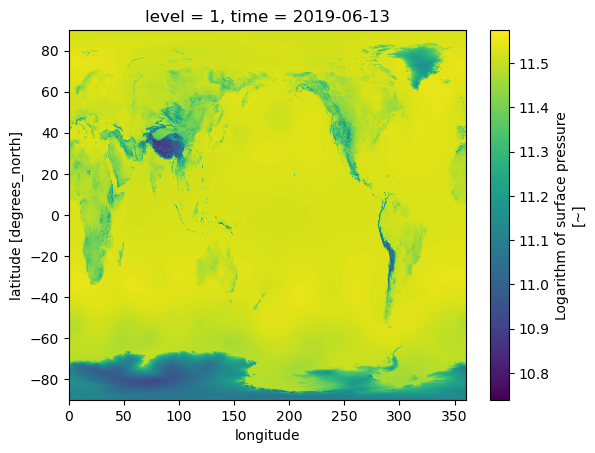

In [18]:
ds.lnsp.isel(time=0, level=0).plot.imshow()